License Plate:-  TN87TC05



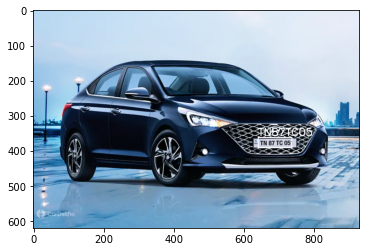

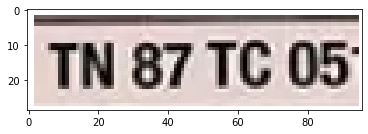

True

In [5]:
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
import pytesseract
import imutils

def build_tesseract_options(psm=7):
    alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    options = "-c tessedit_char_whitelist={}".format(alphanumeric)
    options += " --psm {}".format(psm)
    return options

INPUT_FILE=r"C:\Users\Hard Parikh\Desktop\test_image.jpg"
OUTPUT_FILE=r"C:\Users\Hard Parikh\Desktop\OCR_output.jpg"
LABELS_FILE=r"C:\Users\Hard Parikh\darknet-master\darknet-master\build\darknet\x64\data\obj.names.names"
CONFIG_FILE=r"C:\Users\Hard Parikh\darknet-master\darknet-master\build\darknet\x64\cfg\yolov4-obj.cfg"
WEIGHTS_FILE=r"C:\Users\Hard Parikh\darknet-master\darknet-master\build\darknet\x64\backup\yolov4-obj_final.weights"


CONFIDENCE_THRESHOLD=0.7

LABELS = open(LABELS_FILE).read().strip().split("\n")
net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

image = cv2.imread(INPUT_FILE)
(H, W) = image.shape[:2]

ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
    swapRB=True, crop=False)
net.setInput(blob)
layerOutputs = net.forward(ln)

boxes = []
confidences = []
classIDs = []

for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > CONFIDENCE_THRESHOLD:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,CONFIDENCE_THRESHOLD)

license_plates=[]
if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        license_plate_image=image[y:y+h,x:x+w]
        license_plates.append(license_plate_image)
        gray=cv2.cvtColor(license_plate_image,cv2.COLOR_BGR2GRAY)
        options=build_tesseract_options()
        lpText=pytesseract.image_to_string(gray,config=options)
        print('License Plate:- ',lpText)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255,255,255), 2)
#         text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[classIDs[i]])
        text=lpText.split('\n')[0]
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,255), 2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(r"C:\Users\Hard Parikh\Desktop\Mini-Project\license_plate.jpg", image)
plt.imshow(image[y:y+h,x:x+w])
plt.show()
cv2.imwrite(r"C:\Users\Hard Parikh\Desktop\Mini-Project\license_plate_extracted.jpg", image[y:y+h,x:x+w])